<a href="https://colab.research.google.com/github/bubbles42/Literacy-Rates-Data-Cleaning-and-EDA/blob/main/Data_Cleaning_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Load in data

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Create file URL
fpath = '/content/literacy_rates_updated - literacy_rates_updated.csv'

# Create the dataframe
df = pd.read_csv(fpath)

#View df.head()
df.head()

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,<15,female,0.1761206
1,Central and Southern Asia,Afghanistan,2011,<15,male,0.454171
2,NaN,Afghanistan,2011,15-24,female,0.3211322
3,NaN,Afghanistan,2011,15-24,male,0.6187907
4,Central and Southern Asia,Afghanistan,2011,25-64,female,0.0841276


 * So far we have imported the libraries that we typically need to complete our intial cleaning and analysis. We have also created the dataframe we will be working with inside of Pandas. We also reviewed the first 5 rows of our data to ensure everything looks correctly imported.

###Inital Data Reveiw

In [ ]:
# Check shape of df
df.shape

(3313, 6)

* We can observe here that our df has 3,313 rows with 6 columns.

In [ ]:
# Check the datatypes
df.dtypes

Region           object
Country          object
Year             object
Age              object
Gender           object
Literacy rate    object
dtype: object

* From the initial glance at the dtypes all the data appears to be showing as an object. We will want to take a look at:
 - Literacy rate, as we would expect this to be a float
 - Year, as we would expect this to be a int.
 - The age should be an object as it looks like the data is providing the age as a grouped age range for each row in the column

In [ ]:
# Check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Region         3309 non-null   object
 1   Country        3313 non-null   object
 2   Year           3313 non-null   object
 3   Age            3313 non-null   object
 4   Gender         3313 non-null   object
 5   Literacy rate  3308 non-null   object
dtypes: object(6)
memory usage: 155.4+ KB


 * From the above we can gather a lot of additional information about our dataset:
  - Region and Literacy rate appear to be the only columns that have null values
  - We can also confirm that our dataset is 3,313 rows (indexed from 0 to 3312) andthat all columns are in fact object types so we need to correct that

###Cleaning the data

####Changing the Year column

In [ ]:
# Convert the needed columns into the correct dtypes
df['Year'].value_counts()

2018     575
2011     455
2014     440
2010     402
2012     344
2015     316
2013     268
2016     265
2017     246
2011_      1
3014       1
Name: Year, dtype: int64

 * We can see that there seems to be a type for 2011, so we will fix that, then we see a 3014 which I think is safe to assume is a type for 2014.

In [ ]:
# Set the year column equal to the changes we want made
df['Year'] = df['Year'].replace({'2011_':2011,'3014':2014})

# Check that changes took place
df['Year'].value_counts()

2018    575
2011    455
2014    440
2010    402
2012    344
2015    316
2013    268
2016    265
2017    246
2011      1
2014      1
Name: Year, dtype: int64

In [ ]:
# Finally convert the column into an int
df['Year'] = df['Year'].astype(int)

# Confirm data type
df['Year'].dtypes

dtype('int64')

In [ ]:
df['Year'].value_counts()

2018    575
2011    456
2014    441
2010    402
2012    344
2015    316
2013    268
2016    265
2017    246
Name: Year, dtype: int64

* The issue with the Year column has been addressed. The column is now consistent in values and has been converted to an int.

####Changing the Literacy rate column

In [ ]:
# pd.set_option('display.max_rows', 3500)
df['Literacy rate'].value_counts()

1            19
0.996         7
0.997         5
0.999         5
0.992         5
             ..
0.9901156     1
0.9900582     1
0.9735503     1
0.9710372     1
0.9272311     1
Name: Literacy rate, Length: 3236, dtype: int64

In [ ]:
# Finally convert the column into an int
df['Literacy rate'] = df['Literacy rate'].astype(float)

# Confirm data type
df['Literacy rate'].dtypes

ValueError: ignored

In [ ]:
# initialize an empty list
problem_values = []

# iterate over every value contained in the column
for each in df['Literacy rate']:
  # try-except: a special way to *try* a code statement,
  # and to trigger the *except* statement if the *try* throws
  # an error
  try:          # if the value can be cast, do nothing
    float(each)
  except:       # if the value cannot be cast, store it in the "problem_values" list
    problem_values.append(each)

problem_values

['45.38%']

In [ ]:
# Fix the value that is causing the error
df['Literacy rate'] = df['Literacy rate'].replace({'45.38%':0.4538})

# Finally convert the column into an int
df['Literacy rate'] = df['Literacy rate'].astype(float)

# Confirm data type
df['Literacy rate'].dtypes

dtype('float64')

In [ ]:
df.dtypes

Region            object
Country           object
Year               int64
Age               object
Gender            object
Literacy rate    float64
dtype: object

####Checking the data for duplicates

In [ ]:
# Create variable to filter duplicated rows
dup_rows = df.duplicated()

# Retuen sum of dup_rows
dup_rows.sum()

10

 * From this we can see that there are 10 rows that have duplicated data throughout out dataset. Next, we want to visulize all the data so we can see what these duplicates are.

In [ ]:
# Visualize all duplicated rows
dup_rows_all = df.duplicated(keep=False)

# Calculate all duplicated rows
dup_rows_all.sum()

20

In [ ]:
df[dup_rows_all].sort_values('Country')

,Region,Country,Year,Age,Gender,Literacy rate
17,Central and Southern Asia,Bangladesh,2011,15-24,female,0.795445
18,Central and Southern Asia,Bangladesh,2011,15-24,female,0.795445
38,Central and Southern Asia,Bangladesh,2013,65+,female,0.153041
39,Central and Southern Asia,Bangladesh,2013,65+,female,0.153041
346,Eastern and South-Eastern Asia,China,2010,<15,female,0.927112
347,Eastern and South-Eastern Asia,China,2010,<15,female,0.927112
1158,Latin America and the Caribbean,Colombia,2010,15-24,female,0.985172
1157,Latin America and the Caribbean,Colombia,2010,15-24,female,0.985172
1279,Latin America and the Caribbean,Dominican Republic,2016,15-24,female,0.988674
1278,Latin America and the Caribbean,Dominican Republic,2016,15-24,female,0.988674


* Upon review it is safe to drop our duplicates as they appear to have been entered into the dataset two times with no significance.

In [ ]:
# Drop the duplicates keeping the first row
df.drop_duplicates(inplace=True)

# Confirm duplicates have dropped
df.duplicated().sum()

0

####Checking for inconsistencies

In [ ]:
# Creating object column variable
obj_cols = df.select_dtypes('object').columns
obj_cols

Index(['Region', 'Country', 'Age', 'Gender'], dtype='object')

In [ ]:
# Creating number column variable
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Year', 'Literacy rate'], dtype='object')

In [ ]:
# Create a for loop to see value counts for obj_cols
for col in obj_cols:
  print(f'Value Counts for {col}')
  print(df[col].value_counts())
  print('\n')

Value Counts for Region
Latin America and the Caribbean     940
Sub-Saharan Africa                  770
Northern Africa and Western Asia    568
Europe and Northern America         336
Central and Southern Asia           307
Eastern and South-Eastern Asia      282
Oceania                              96
Name: Region, dtype: int64


Value Counts for Country
Mexico                 72
Uruguay                72
Brazil                 72
Palestine              64
Turkey                 64
                       ..
Trinidad and Tobago     8
Greece                  8
Estonia                 8
Hungary                 8
Antigua and Barbuda     4
Name: Country, Length: 155, dtype: int64


Value Counts for Age
<15      840
15-24    826
25-64    826
65+      811
Name: Age, dtype: int64


Value Counts for Gender
female    1648
male      1648
F            4
M            3
Name: Gender, dtype: int64




* From this review we can see that we will need to address the inconsistent values in the Gender column

In [ ]:
# Fix the 'F' and 'M' in Gender to be consistent
df['Gender'] = df['Gender'].replace({'F':'female', 'M':'male'})

# Verify change took place
df['Gender'].value_counts()

female    1652
male      1651
Name: Gender, dtype: int64

In [ ]:
# Create a for loop to see value counts for num_cols
for col in num_cols:
  print(f'Value Counts for {col}')
  print(df[col].value_counts())
  print('\n')

Value Counts for Year
2018    574
2011    455
2014    440
2010    400
2012    344
2015    316
2013    264
2016    264
2017    246
Name: Year, dtype: int64


Value Counts for Literacy rate
1.000000    19
0.996000     7
0.992000     5
0.997000     5
0.999000     5
            ..
0.910514     1
0.963340     1
0.964806     1
0.990116     1
0.927231     1
Name: Literacy rate, Length: 3236, dtype: int64




* The number columns appear to be consistent

####Filling missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3303 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3299 non-null   object 
 1   Country        3303 non-null   object 
 2   Year           3303 non-null   int64  
 3   Age            3303 non-null   object 
 4   Gender         3303 non-null   object 
 5   Literacy rate  3298 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 180.6+ KB


* We now need to address the missing values in the Region and in the Literacy rate columns

Region           4
Country          0
Year             0
Age              0
Gender           0
Literacy rate    5
dtype: int64

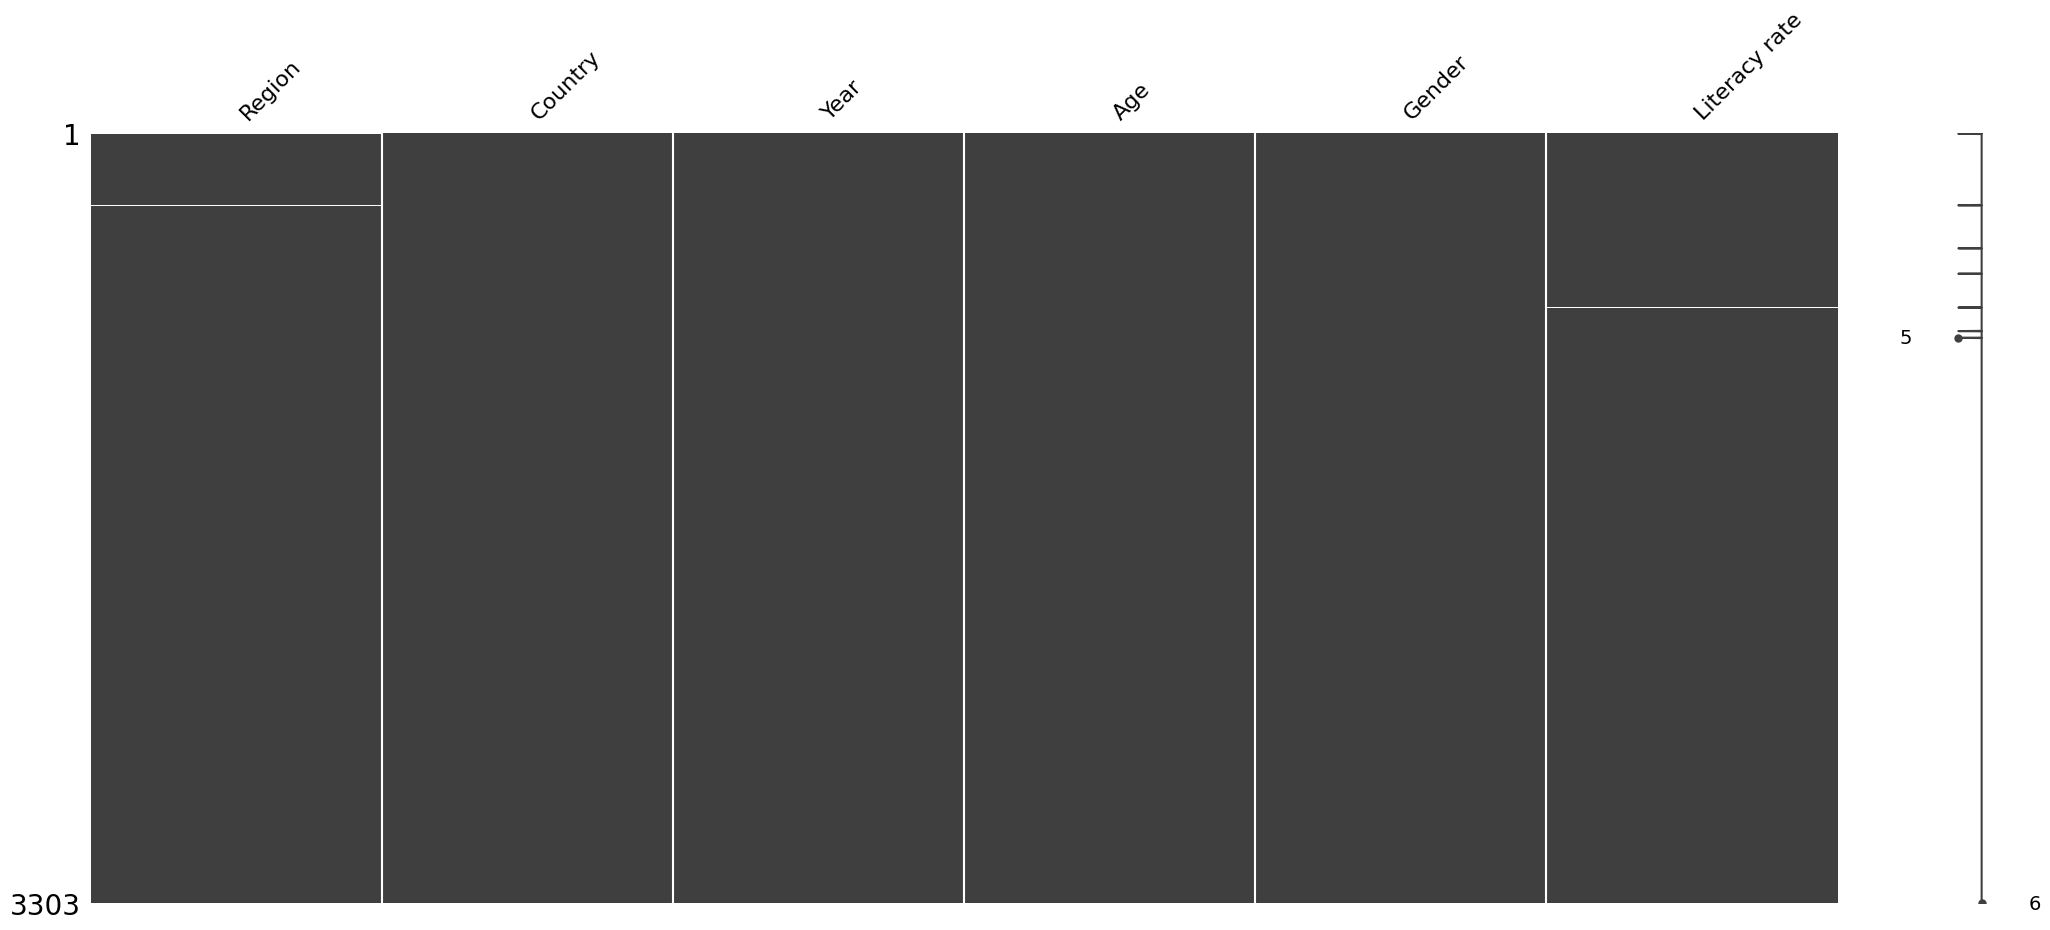

In [ ]:
# Review the null values in dataframe
import missingno as msno
msno.matrix(df)

all_null = df.isna().sum()
all_null

In [ ]:
df[df.isna().any(axis=1)]

,Region,Country,Year,Age,Gender,Literacy rate
2,NaN,Afghanistan,2011,15-24,female,0.321132
3,NaN,Afghanistan,2011,15-24,male,0.618791
312,NaN,Uzbekistan,2016,65+,female,0.996698
313,NaN,Uzbekistan,2016,65+,male,0.999018
498,Eastern and South-Eastern Asia,Singapore,2010,65+,male,NaN
608,Europe and Northern America,Albania,2012,15-24,female,NaN
753,Europe and Northern America,Portugal,2011,15-24,male,NaN
855,Europe and Northern America,Spain,2010,<15,female,NaN
884,Europe and Northern America,Spain,2013,25-64,male,NaN


In [ ]:
# Replace the unkonwn literacy rates with a -1
df['Literacy rate'] = df['Literacy rate'].fillna(-1)
df['Literacy rate'].isna().sum()

0

In [ ]:
df['Region'] = df['Region'].fillna('Missing')
df['Region'].isna().sum()

0

####Checking for unusual data and outliers

In [ ]:
# Check stats for numeric columns
df.describe(include='number')

,Year,Literacy rate
count,3303.000000,3303.000000
mean,2013.988193,0.814556
std,2.746317,0.245270
min,2010.000000,-1.000000
25%,2011.000000,0.725364
50%,2014.000000,0.929284
75%,2016.000000,0.985461
max,2018.000000,1.000000


In [ ]:
# Check stats on object columns
df.describe(include='object')

,Region,Country,Age,Gender
count,3303,3303,3303,3303
unique,8,155,4,2
top,Latin America and the Caribbean,Mexico,<15,female
freq,940,72,840,1652


* After reviewing that stats for the dataset, nothing seems to out of place. We already know that the missing literacy rates that were missing had been replaced with a -1

###Data Exploration with Visuals

####Univariate Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3303 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3303 non-null   object 
 1   Country        3303 non-null   object 
 2   Year           3303 non-null   int64  
 3   Age            3303 non-null   object 
 4   Gender         3303 non-null   object 
 5   Literacy rate  3303 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 180.6+ KB


In [ ]:
# Lets start by looking how each column is distributed
cols = df.columns
cols

for c in cols:
  ax = sns.histplot(data=df, y=c, bins = 'auto')
  ax.set(title=(f'{c} Distribution'))
  plt.show();

In [ ]:
# Look at age distribtion
ax = sns.histplot(data=df, x='Age', bins = 'auto')
ax.set(title=(f'Age Distribution'));

* This histogram shows us under 15 has the most data within our dataset, however, it is fairly balanced across all age groups.

In [ ]:
# Look at gender distribution
ax = sns.histplot(data=df, x='Gender', bins = 'auto')
ax.set(title=(f'Gender Distribution'));

* It appears there are slightly higher rate of females within our dataset, but it is pretty balanced between the two genders.

After looking at several other graphs there really is not any other ones I am finding to have a helpful visulization of.

####Multivariate Exploration

In [ ]:
df.info()

In [ ]:
# Find correlation to start visualizing
corr = df.corr(numeric_only=True)
corr

,Year,Literacy rate
Year,1.000000,0.011893
Literacy rate,0.011893,1.000000


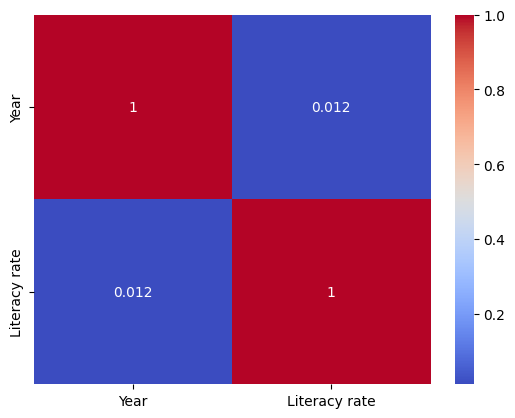

In [ ]:
sns.heatmap(corr, annot=True, cmap='coolwarm');

As expected we do not have many numberical columns, and the heatmap is showing no real correlation between the Year and Literacy rate

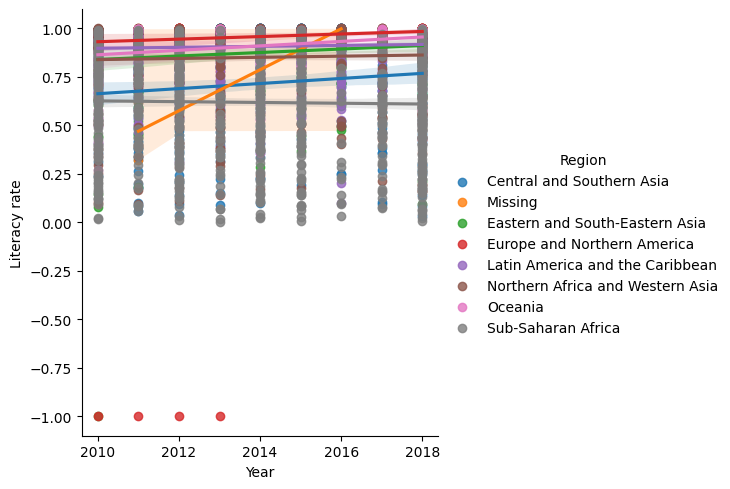

In [ ]:
ax = sns.lmplot(data=df, x='Year', y='Literacy rate', hue='Region')

We can conclude from this graph that for the most part literacy rates have maintained fairly level. However, it appears that the Sub-Saharan Africa region has been seeing a sligh decline. The exact opposite appears to be true for Central and Southern Asia, as they appear to be increasing in literacy.

In [ ]:
def check_missing_and_constant_features(df, threshold=0.9, fillna=False):
    """
    This function takes a DataFrame and checks for missing values and constant features.
    It prints the total number of missing values and a statement of whether the feature is a constant or quasi-constant.

    Parameters:
    df: The DataFrame to check.
    threshold: The threshold for determining if a feature is constant or quasi-constant. The default is 0.9.

    Returns:
    A DataFrame with the missing values filled in.
    """

    df_copy = df.copy()

    for col in df_copy.columns:
        num_missing = df_copy[col].isnull().sum()
        num_total = df_copy[col].count()
        percent_missing = num_missing / num_total
        print(f'The feature {col} has {num_missing} missing values ({percent_missing:.2%} of the total).')
        if df_copy[col].dtype == 'object':
            df_copy[col] = df_copy[col].fillna('Missing')
        if percent_missing >= threshold:
            print(f'The feature {col} is a quasi-constant and will be dropped.')
            df_copy.drop(col, axis=1, inplace=True)
        elif percent_missing > 0:
            print(f'The feature {col} has missing values and will be imputed.')
            df_copy[col] = df_copy[col].fillna(df_copy[col].mode()[0])
        else:
            print(f'The feature {col} has no missing values.')

    return df_copy

In [ ]:
check_missing_and_constant_features(df)

The feature Region has 0 missing values (0.00% of the total).
The feature Region has no missing values.
The feature Country has 0 missing values (0.00% of the total).
The feature Country has no missing values.
The feature Year has 0 missing values (0.00% of the total).
The feature Year has no missing values.
The feature Age has 0 missing values (0.00% of the total).
The feature Age has no missing values.
The feature Gender has 0 missing values (0.00% of the total).
The feature Gender has no missing values.
The feature Literacy rate has 0 missing values (0.00% of the total).
The feature Literacy rate has no missing values.


,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,<15,female,0.176121
1,Central and Southern Asia,Afghanistan,2011,<15,male,0.454171
2,Missing,Afghanistan,2011,15-24,female,0.321132
3,Missing,Afghanistan,2011,15-24,male,0.618791
4,Central and Southern Asia,Afghanistan,2011,25-64,female,0.084128
...,...,...,...,...,...,...
3308,Sub-Saharan Africa,Zimbabwe,2014,15-24,male,0.875919
3309,Sub-Saharan Africa,Zimbabwe,2014,25-64,female,0.880485
3310,Sub-Saharan Africa,Zimbabwe,2014,25-64,male,0.897255
3311,Sub-Saharan Africa,Zimbabwe,2014,65+,female,0.734258
